Dependencies

In [218]:
import pandas as pd

Download Dataset

In [296]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## Visualize the Dataset

In [220]:
housing.head() # top five rows in the dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [221]:
housing.info() # get quick description of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [222]:
housing['ocean_proximity'].value_counts() # select a column and find out how many categories exist 

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [223]:
housing.describe() # summary of the numerial atributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plot Histogram

In [224]:
import matplotlib.pyplot as plt

In [297]:


# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



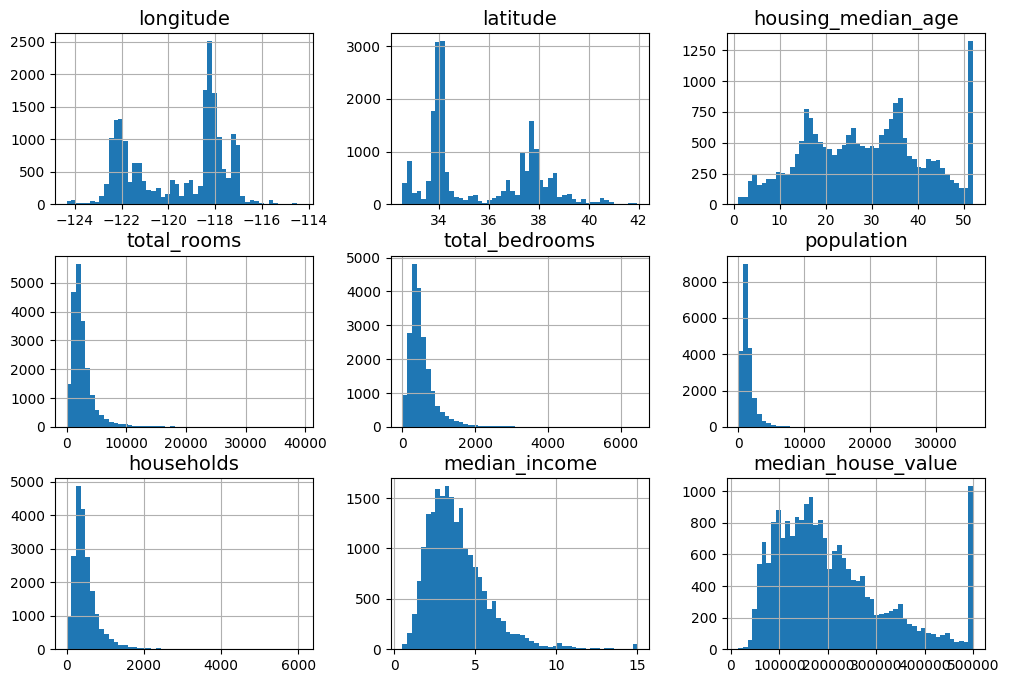

In [225]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50,figsize=(12,8)) # create histogram with data
plt.show()


### Create a test set

In [226]:
import numpy as np

In [227]:
def shuffle_and_split_data(data,test_ratio):
  shuffled_indices = np.random.permutation(len(data)) # shuffle index of dataset
  test_set_size = int(len(data)*test_ratio) # set the data test size. 0.2*20640 = 4128
  test_indices = shuffled_indices[:test_set_size] # get the 4128 random index in the array
  train_indices = shuffled_indices[test_set_size:] # get the 16512 randon index in the array
  return data.iloc[train_indices],data.iloc[test_indices] # return two different datasets. The iloc method get the data by index lines.
  

In [228]:
train_set,test_set=shuffle_and_split_data(housing,0.2) # declare variables with new shuffled data. Test ratio 20%
train_set,test_set 


(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
 14196    -117.22     32.75                34.0       6001.0          1111.0  \
 8267     -117.03     32.69                10.0        901.0           163.0   
 17445    -122.27     37.74                28.0       6909.0          1554.0   
 14265    -121.82     37.25                25.0       4021.0           634.0   
 2271     -115.98     33.32                 8.0        240.0            46.0   
 ...          ...       ...                 ...          ...             ...   
 11284    -122.37     37.94                49.0        969.0           229.0   
 11964    -118.38     33.89                35.0       1778.0           330.0   
 5390     -119.33     36.28                16.0       2624.0           527.0   
 860      -117.19     34.08                22.0       2467.0           555.0   
 15795    -118.86     34.22                22.0       1230.0           200.0   
 
        population  households  median

In [229]:
len(train_set)

16512

In [230]:
len(test_set)

4128

In [231]:
np.random.seed(42) # Set the random number generator's seed so that it always generates the same shuffled indice.

Ensure that the data will remain consistent across multiple runs, even if you refresh the data. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

Here is a possible implementation

In [232]:
from zlib import crc32

In [233]:
def is_id_in_test(identifier,test_ratio):
  return crc32(np.int64(identifier)) < test_ratio*2**32

def split_data_with_id_hash(data,test_ratio,id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_:is_id_in_test(id_,test_ratio))
  return data.loc[~in_test_set],data.loc[in_test_set]

Use the row index as the ID

In [234]:
housing_with_id = housing.reset_index() # adds an 'index' column
train_set,test_set = split_data_with_id_hash(housing_with_id,0.2,"index")
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Build a unique ID. Combine latitude and longitude into an ID like so:

In [235]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
#print(housing_with_id["id"])
train_set,test_set = split_data_with_id_hash(housing_with_id,0.2,"id")
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


Scikit-Learn provides a few functions to split datasets into multiple subsets in various way.First, there is a random_state parameter that allows you to set the random generator seed. Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices ( this is useful, for exemple, if you have a separate DataFrame for labels):

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [290]:
test_set['total_bedrooms'].isnull().sum()

44

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The cdf() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [291]:


# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)



0.10736798530929913




If you prefer simulations over maths, here's how you could get roughly the same result:


In [292]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

May want to ensure that the test set is representative of the various categories of income in the whole dataset

<AxesSubplot: >

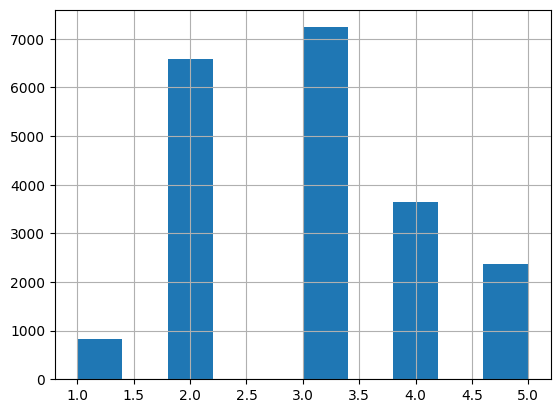

In [238]:
housing['income_cat'] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing['income_cat'].hist()

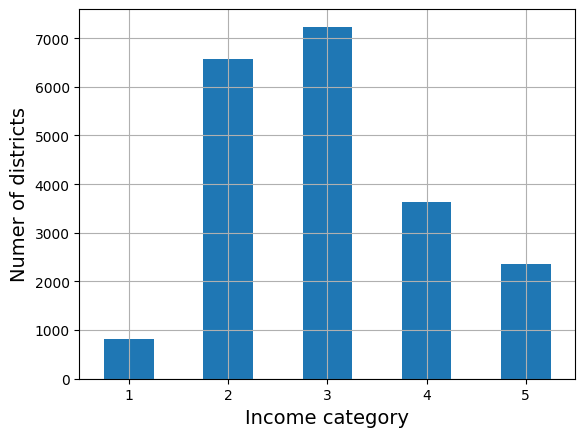

In [239]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Numer of districts")
plt.show()

Ready to do stratified sampling based on the income category. Scikit-learn provides a number of splitter classes in the sklearn.model_selection package that implement various strategies to split your dataset into a training set and a test set. Each splitter has a split() method that returns an iterator over different training/test splits of the same data.

To be precise, the split() method yields the training and test indices, not the data itself. Having multiple splits can be useful if you want to better estimate the perfomance of your model. The following code generates 10 different stratified splits of the same dataset: 

In [240]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits = []
for train_index,test_index in splitter.split(housing,housing['income_cat']):
  strat_train_set_n= housing.iloc[train_index]
  strat_test_set_n=housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])

First split

In [241]:
strat_train_set,strat_test_set = strat_splits[0]
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


Since stratified sampling is fairly common, there's a shorter way to get a single split using the train_test_split() function with the stratify argument:

In [242]:
strat_train_set,strat_test_set = train_test_split(housing, test_size=0.2,stratify=housing['income_cat'],random_state=42)

In [243]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [293]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.59,0.51,15.38
2,31.86,31.88,31.78,0.05,-0.26
3,35.03,35.05,34.75,0.07,-0.79
4,17.68,17.64,17.22,-0.26,-2.60
5,11.45,11.43,11.65,-0.12,1.81


In [294]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


In [244]:
strat_test_set["income_cat"].value_counts()

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

## Explore and Visualize the Data to Gain Insights

Put the test set aside and you are only exploring the training set. Also, if the training set is very large , you may want to sample an exploration set, to make manipulations easy and fast during the exploration phase. Since you're going to experiment with various transformations of the full training set, you should make a copy of the original so you can revert to it afterwards:

In [245]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

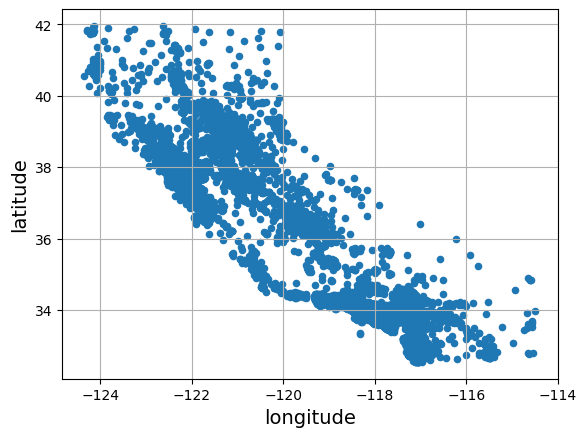

In [246]:
housing.plot(kind='scatter', x= 'longitude',y='latitude',grid=True)
plt.show()

Setting the alpha option to 0.2 makes it much easier to visualize the places where there is a high density of data points

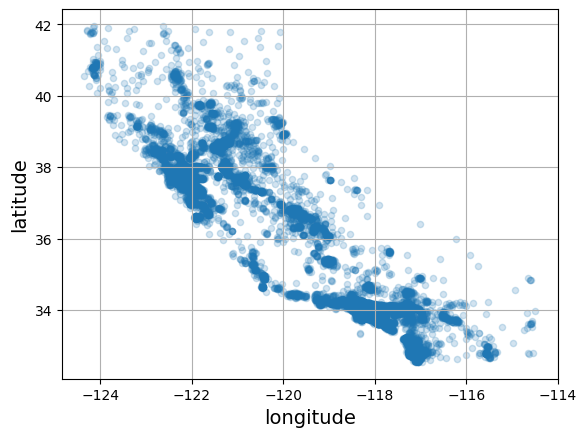

In [247]:
housing.plot(kind = 'scatter', x = 'longitude',y ='latitude', grid=True,alpha=0.2)
plt.show()

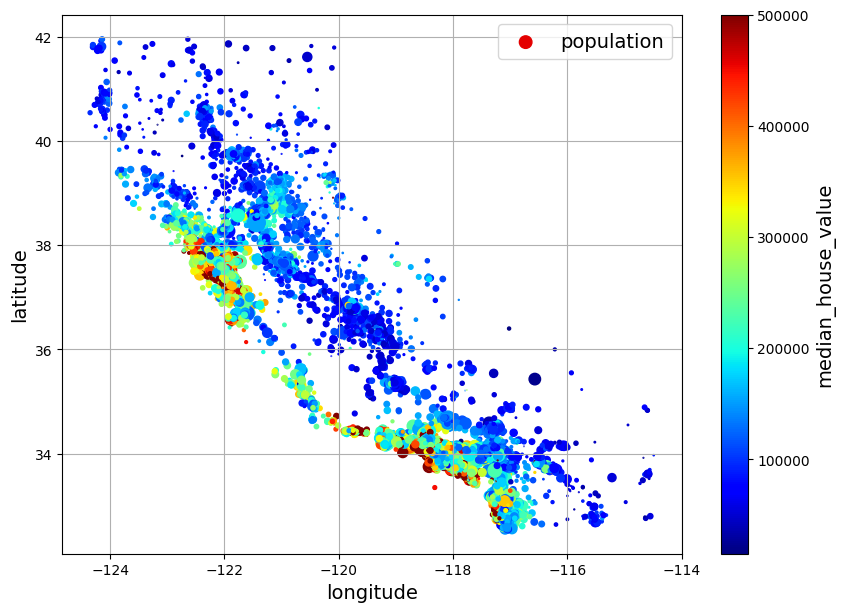

In [248]:
housing.plot(kind='scatter',x = 'longitude', y = 'latitude', grid = True, s = housing['population'] / 100, label = 'population', c = "median_house_value", cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))
plt.show()



The argument sharex=False fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

The next cell generates the first figure in the chapter (this code is not in the book). It's just a beautified version of the previous figure, with an image of California added in the background, nicer label names and no grid.


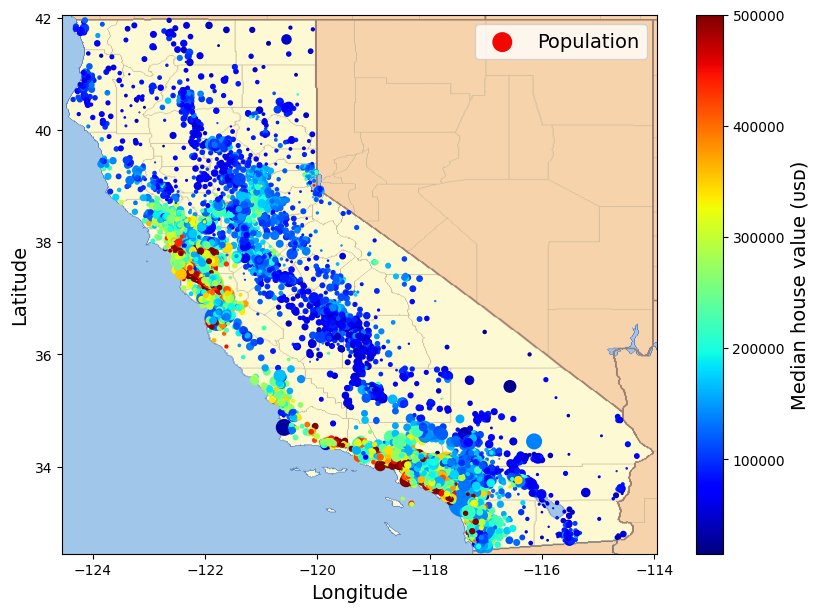

In [298]:


# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()



### Looking from Correlations


In [249]:
corr_matrix = housing.corr(numeric_only=True)

In [250]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

When it is close to 1 , it means that there is a strong positivie correlation; for example, the median house value tends to go up when the median incomes goes uo. When the coefficient is close to -1, it means that there is a strong negative correlation;you can see a small nagative correlation between the latitude and the median house value. Finally, coefficients close to 0 mean that there is no linear correlation

Another way to check for correlation between attributes is to use the Pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute. Since there are 11 numerical attribute, it gets 11^2 = 121 plots, which would not fit on a page - so it was decided to focus on a few promising attributes that seem most correlated with the median housing value.

In [251]:
from pandas.plotting import scatter_matrix

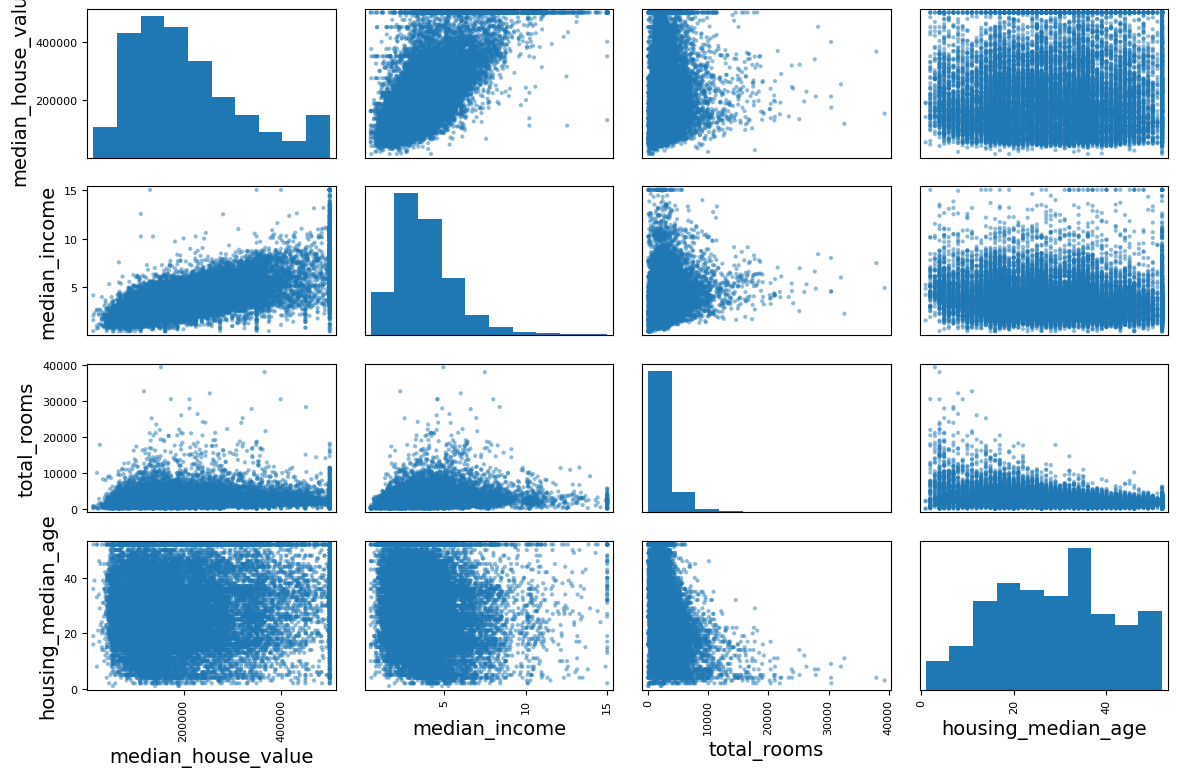

In [299]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

It seems like the most promising attribute to predict the median house value is the median income,so you zoom in on their scatterplot

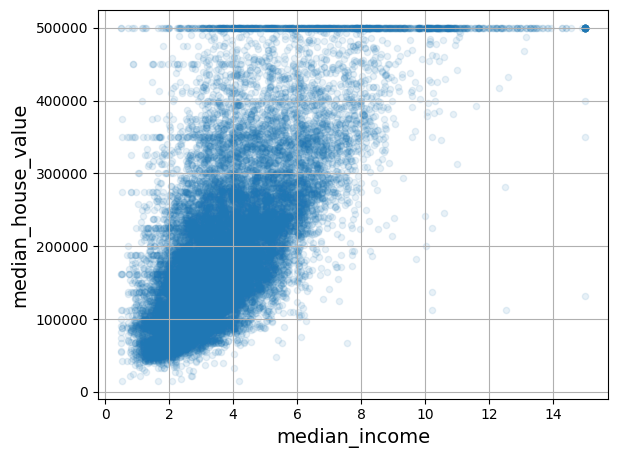

In [300]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

### Experiment with Attribute Combinations


Identified a few data quirks that you may want to clean up before feeding the data to a machine learning algorithm, and found interesting correlations between attributes, in particular with target attribute.

One last thing may want to do before preparing the data for machine learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don't know how many households there are. What you really want is the number of rooms per households. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seem like a interesting attribute combination to look at. You create these new attributes as follows:

In [254]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing ["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]
housing["people_per_house"].head()

13096    1.524178
14973    1.865546
3785     2.768473
14689    2.365385
20507    1.631399
Name: people_per_house, dtype: float64

In [255]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix = corr_matrix["median_house_value"].sort_values(ascending=False)
corr_matrix


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

The new bedrooms_ratio attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ration tend to be more expensive

<AxesSubplot: xlabel='bedrooms_ratio', ylabel='median_house_value'>

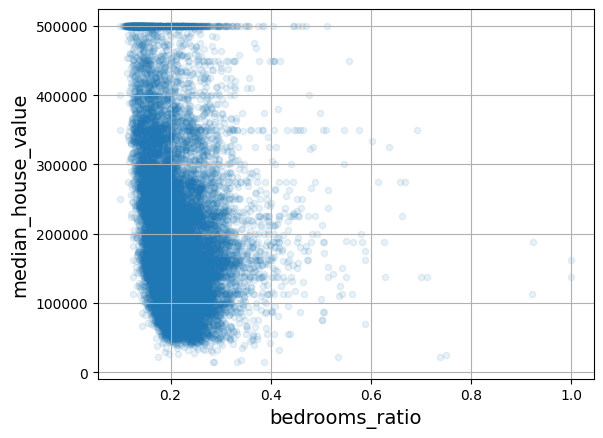

In [256]:
housing.plot(kind='scatter',x='bedrooms_ratio',y='median_house_value',alpha=0.1,grid=True)

The number of rooms per household is also more informative that the total number of rooms in a district - obviously the larger the houses, the more expensive they are

In [257]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3,3.725256,0.277371,1.631399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4,4.277247,0.266875,1.793499
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2,5.535714,0.201019,2.667293
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3,5.157895,0.197704,3.702632
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3,4.511933,0.230891,2.058473


 ## Prepare the Data for Machine Learning Algorithms

Time to prepare the data for your machine learning algorithms. Instead of doing this manually, you should write functions for this purpose, for serveral good reasons:
- This will allow to reproduce these transformations easily on any dataset;
- You will gradually build a library of transformation functions that you can reuse in future projects;
- You can use these functions in your live system to transform the new data before feeding it to your algorithms;
- This will make it possible for you to easily try various transformations and see which combination of transformations works best.

Separate the predictors and the labels, since you don't necessarily want to apply the same transformations to the predictors and the target value (note that drop() create a copy of the data and does not affect strat_train_set)

In [258]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Clean the Data

Most machine learning algorithms cannot work with missing features. For example, total_bedrooms attribute has some missing values. There is three options to fix this:
- Get rid of the corresponding districts
- Get rid of the whole attribute
- Set the values to some value (zero, the mean, the median, etc.)

You can accomplish theses easily using Pandas DataFrame's dropna(), drop(), and fillna() methods:

In [302]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND


In [303]:
housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"],inplace=True) # option 1
housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [308]:
housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms",axis=1,inplace=True) # option 2
housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,375.0,158.0,1.7083,48500.0,INLAND


In [309]:


housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,435.0,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,435.0,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,435.0,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,435.0,375.0,158.0,1.7083,48500.0,INLAND


For each option, we'll create a copy of housing and work on that copy to avoid breaking housing. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

You decided to go for option 3 since it is the least destructive,but instead of the precending code, you will use a handy Scikit-Learn class: SimpleImputer. The benefit is that it will store the median value of each feature: this will make it possible to impute missing values not only on the training set, but also on the validation set, the test set, and any new data fed to the model. 

To use it, first you need to create a SimpleImputer instance, specifying that you want to replace each attribute's missing values with the median of that attribute.

In [262]:
from sklearn.impute import SimpleImputer

In [263]:
imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes,you then need to create a copy of the data with only the munerical attributes (this will exclude the text attributes ocean_proximity)

In [264]:
housing_num = housing.select_dtypes(include=[np.number])

Now you can fit the imputer instance to the training data using the fit() method:

In [265]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attibute and stored the result in its statistics_ instace variable. Only the total_bedrooms attribute had missing values, but you cannot be sure that there won't be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [266]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [267]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

Now you can use this "trained" imputer to transform the training set by replacing missing values with the learned medians:

In [268]:
X = imputer.transform(housing_num)

Missing values can also be replaced with the mean value (strategy="mean"), or with the most frequent value(strategy="most_frequent"),or with a constat value(strategy="constant",fill_value=...). The last two strategies support non-numerical data.

## _TIP_
There are also more powerful imputers available in the sklearn.imputer package (both for numerical features only):
- KNNImputer replaces each missing value with the mean of the k-nearest neighbors' values for that feature. The distance is based on all the available features.
- IterativeImputer trains a regression model per feature to predict the missing values based on all other available features. It then trains the model again on the updated data, and repeats the process several times, improving the models and the replacement values at each iteration.

## _SCIKIT-LEARN DESIGN_
### These are the main design principles:
- Consistency: All objects share a consistent and simple interface:

    - *Estimators*: Any object that can estimate some parameters based on a dataset is called an estimator(SimpleImputer is an estimator). The estimation itself is performed by the fit() method, and it takes a dataset as parameter,or two for supervised learning algorithms. Any other parameter needed to guide the estimation process is considered a hyperparameters (such as a SimpleImputer's strategy), and it must be set as an instace variable (generally via constructor parameter).

    - *Transformers*: Some estimators (such as a SimpleImputer) can also transform a dataset; these are called *transform*. Once again, the API is simple: the transformation is performed by the *transform()* method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a SimpleImputer. All transformers also have a convenience method called *fit_transform()*, which is equivalent to calling *fit()* and then *transform()* (but sometimes *fit_transform()* is optimized and runs much faster).
    
    - *Predictors*: Finally ,some estimators, given a dataset, are capable of making predictions; they are called *predictors*. For example, the *LinearRegression* model in the previous chapter was a predictor: given a country's GDP per capita, it predicted life satisfaction. A predictor has a *predict()* method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a *score()* method that measures the quality of the predictions, given a test set(and the corresponding labels, in the case of supervised learning algorithms).

    - *Inspection*: All the estimator's hyperparameters are accessible directly via public instance variables(*imputer.statistics*), and all the estimator's learned parameters are accessible via public instance variables with an underscore suffix(*imputer.statistics_*).

    - *Nonproliferation of classes*: Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

    - *Composition*: Existing building blocks are reused as much as possible. For example, it is easy to create a *Pipeline* estimator from an arbitrary sequence of transformers followed by a final estimator, as you will see.

    - *Sensible defaults*: Scikit-learn provides reasonable default values for most parameters, making it easy to quickly create a baseline working system.

In [269]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16344 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16344 non-null  float64
 1   latitude            16344 non-null  float64
 2   housing_median_age  16344 non-null  float64
 3   total_rooms         16344 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16344 non-null  float64
 6   households          16344 non-null  float64
 7   median_income       16344 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [270]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matrices) even when there are fed Pandas DataFrames as input. So, the output of imputer.transform(housing_num) is a NumPy array: *X* has neither column names nor index. Luckly, it's not too hard to wrap *X* in a DataFrame and recover the column names and index from housing_num:

In [271]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


### Handling Text and Categorical Attributes

In [272]:
housing_categorical = housing[["ocean_proximity"]]
housing_categorical

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


Most machine learning algorithms prefer to work with numbers, so let's convert these categories from text to numbers. For this, we can usen Scikit-Learn's OrdinalEncoder class:

In [273]:
from sklearn.preprocessing import OrdinalEncoder

In [274]:
ordinal_encoder = OrdinalEncoder()
housing_categorical_encoded = ordinal_encoder.fit_transform(housing_categorical)
housing_categorical_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

Get the list of categories using the *categories_* instance variables. It is a list containing a 1D array of categories for each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute)

In [275]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similiar then two distant values. This may be fine in some cases (for ordered categories such as "bad","average","good" and "excellent"), but it is obviously not the case for the *ocean_proximity* column(for example, categories 0 and 4 are clearly more similar than categories 0 and 1).

To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the category is "INLAND" (and 0 otherwise), and so on. This is called *one-hot encoding*, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called *dummy* attributes, Scikit-Learn provides a *OneHotEncoder* class to convert categorical values into one-hot values:

In [276]:
from sklearn.preprocessing import OneHotEncoder

In [277]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_categorical)

In [278]:
housing_cat_1hot

<16344x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16344 stored elements in Compressed Sparse Row format>

Sparse matrix is a very efficient representation for matrices that contain mostly zeros. Indeed, internally it only stores the nonzero values and their positions. When a categorical attribute has hundreds or thousands of categories, one-hot encoding it results in a very large matrix full of 0s expect for a single 1 per row. It will save plenty of memory and speed up computations.

You can use a sparse matrix mostly like a nomel 2D array, but if you want to convert it to a (dense) NumPy array, just call the *toarray()* method:

In [279]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Alternatively, you can set *sparse=False* when creating the *OneHotEncoder*, in which case the *transform()* method will return a regular (dense) NumPy array directly.

In [280]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Pandas has a function called *get_dummies()*, which also converts each categorical feature into one-hot representation, with one binary feature per category:

In [281]:
df_test = pd.DataFrame({"ocean_proximity":["INLAND","NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [282]:
df_test

,ocean_proximity
0,INLAND
1,NEAR BAY


Why not use *get_dummies* instead of *OneHotEncoder*? Well, the advantage of *OneHotEncoder* is that it remembers which categories it was trained on. This is very important because once your model is in production, it should be fed exactly the same features as during training: no more, no less. Look what our trained *cat_encoder* outputs when we make it transform the same *df_test* (using *transform()*, not *fit_transform()*):


In [283]:
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [284]:
cat_encoder

OneHotEncoder()

*get_dummies()* saw only two categories, so it output two columns, whereas *OneHotEncoder* output one column per learned category, in the right order. Moreover, if you feed *get_dummies()* a DataFrame containing an unknown category("<2H OCEAN"), it will happily generate a column for it:

In [285]:
df_test_unknown = pd.DataFrame({"ocean_proximity":["<2H OCEAN","ISLAND"]})
print(df_test_unknown)
pd.get_dummies(df_test_unknown)

  ocean_proximity
0       <2H OCEAN
1          ISLAND


,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


But *OneHotEncoder* is smarter: it will detect the unknown category and raise an exception. If you prefer, you can set the *handle_unknow* hyperparameter to "ignore", in which case it will just represent the inknown category with zeros:

In [286]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

## _Tip_

If a categorical attribute has a large number of possible categories (country code, profession, species), then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). Alternatively, you can use one of the encoders provided by the *category_encoders* package on GitHub. Or, when dealing with neural networks, you can replace each category with a learnable, low-dimensional vector called an embedding. This is an example of *representation learning*.

When you fit any Scikit-Learn estimator using a DataFrame, the estimator stores the column names in the feature_name_in_attribute

In [287]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [288]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [289]:


df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

ValueError: Shape of passed values is (2, 1), indices imply (2, 5)

## Feature Scaling

One of the most important transformations you need to apply to your data is *feature scaling*. With few exceptions, ML algorithms don't perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler(with_mean=True)
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[-1.42263435,  1.01312356,  1.86068722, ...,  0.13757239,
         1.395732  , -0.93755681],
       [ 0.5966805 , -0.70227426,  0.90752642, ..., -0.69327638,
        -0.3735368 ,  1.1713802 ],
       [-1.20270897,  1.2755888 ,  0.35151595, ..., -0.78823052,
        -0.77599971, -0.76081193],
       ...,
       [ 1.25645664, -1.42874055, -1.23708538, ...,  1.26789191,
         0.67966161,  0.10023117],
       [ 0.58668389, -0.73976929,  0.66923622, ...,  0.27361246,
         0.88350647,  0.14458922],
       [-1.41763605,  0.94750725,  1.22524669, ..., -0.67866805,
        -0.75247915, -0.31125713]])

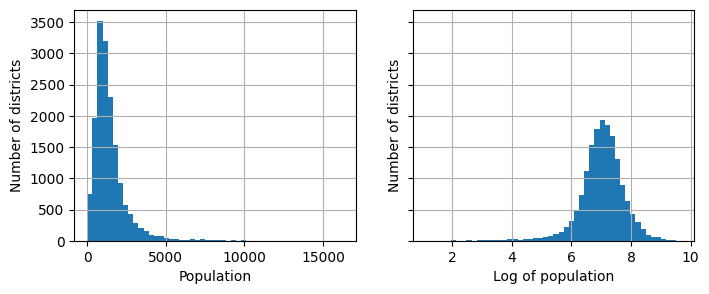

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8,3),sharey=True)
housing['population'].hist(ax=axs[0],bins = 50)
housing['population'].apply(np.log).hist(ax=axs[1],bins=50)
axs[0].set_xlabel('Population')
axs[1].set_xlabel('Log of population')
axs[0].set_ylabel('Number of districts')
axs[1].set_ylabel('Number of districts')
plt.show()
  

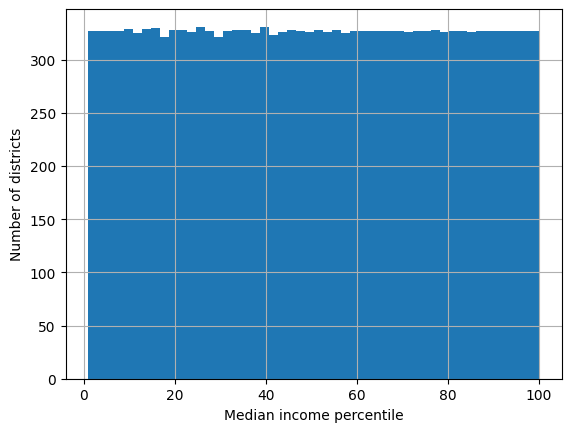

In [ ]:
percentiles = [np.percentile(housing['median_income'],p)
               for p in range(1,100)]
flattened_median_income = pd.cut(housing['median_income'],
                                 bins=[-np.inf]+percentiles+[np.inf],
                                 labels=range(1,100+1))

flattened_median_income.hist(bins=50)
plt.xlabel('Median income percentile')
plt.ylabel('Number of districts')
plt.show()

# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[['housing_median_age']],[[35]],gamma=0.1)

age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

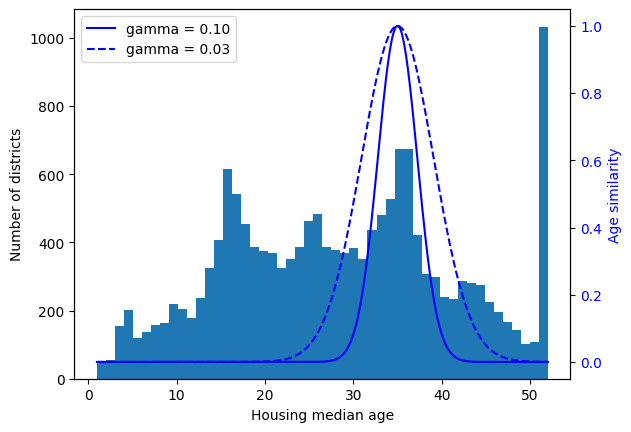

In [ ]:
ages = np.linspace(housing['housing_median_age'].min(),
                  housing['housing_median_age'].max(),
                  500).reshape(-1,1)

gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages,[[35]],gamma=gamma1)
rbf2 = rbf_kernel(ages,[[35]],gamma=gamma2)

fig,ax1=plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()


In [ ]:


from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)



ValueError: Found input variables with inconsistent numbers of samples: [16344, 16512]